# Single-cell event counter

### This notebook counts the spatio-temporal distribution of cellular events in the local neighbourhood of an apoptotic cell

1. Load tracking data of cells from specific experiment (HDF5 tracking file) 
2. Load target cell, featuring the focal apoptosis of the scan
3. Calculate spatio-temporal distribution of events around focal apoptosis time of target cell
4. Plot as heatmap

In [2]:
import calculate_radial_analysis as calculate
import tools 
import render

## 1) Load tracking data of cells from one experiment

`tools.load_tracking_data('path_to_segmented.hdf5')` gives three outputs, wt_cells, scr-cells and all_cells (separate outputs so you can choose which to count later)

In [3]:
wt_cells, scr_cells, all_cells = tools.load_tracking_data('/home/nathan/data/kraken/h2b/giulia/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5')

[INFO][2021/02/24 11:51:42 AM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/02/24 11:51:42 AM] Loading tracks/obj_type_1


Btrack version no.: 0.4.0


[INFO][2021/02/24 11:51:44 AM] Loading objects/obj_type_1 (408973, 5) (388394 filtered: area>=100)
[INFO][2021/02/24 11:51:47 AM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/02/24 11:51:47 AM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/02/24 11:51:47 AM] Loading tracks/obj_type_2
[INFO][2021/02/24 11:51:47 AM] Loading objects/obj_type_2 (12115, 5) (8894 filtered: area>=100)
[INFO][2021/02/24 11:51:47 AM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs


## 2) Load target cell 
`tools.select_target_cell(cell_type, cell_ID, cells)` gives two outputs, the target cell selected from the list of cells previously loaded and the focal time (apoptosis if Scr)

In [25]:
target_cell, focal_time = tools.select_target_cell('Scr', '3', all_cells)

In [26]:
target_cell

,ID,t,x,y,z,parent,root,state,generation,dummy
0,-3,0,659.520081,1209.398804,0.0,3,3,0,0,False
1,-3,1,660.092407,1210.869995,0.0,3,3,0,0,False
2,-3,2,660.646606,1211.446777,0.0,3,3,0,0,False
3,-3,3,662.080444,1211.120728,0.0,3,3,0,0,False
4,-3,4,662.347107,1208.097412,0.0,3,3,0,0,False
5,-3,5,664.090759,1207.369507,0.0,3,3,0,0,False
6,-3,6,666.197205,1207.502930,0.0,3,3,0,0,False
7,-3,7,667.963745,1205.844116,0.0,3,3,0,0,False
8,-3,8,669.411743,1206.816284,0.0,3,3,0,0,False
9,-3,9,669.987549,1206.707275,0.0,3,3,0,0,False


## 3) Calculate spatio-temporal distribution of events around focal time of target cell

`calculate.P_event(event_type, cell_type, target_cell, radius, t_range, focal_time, num_bins)` returns a 2D histogram image showing the spatio(y)-temporal(x) distribution of cellular events. The input variables are:

- `event_type` = Event to count instances of i.e. 'DIVISION'/'APOPTOSIS'
- `cell_type` = Population of cells to scan over i.e. wt_cells, scr_cells, all_cells
- `radius, t_range` = Spatial and temporal range to scan over 
- `target_cell, focal_time` = the cell and timepoint of interest that the scan is focused around
- `num_bins` = resolution of scan, higher the number the more the number of bins the count is binned into

In [17]:
radius = 250
t_range = 500
num_bins = 10

P_events_hist = calculate.P_event('DIVIDE', 
                                  wt_cells, 
                                  target_cell, 
                                  radius, 
                                  t_range, 
                                  focal_time, 
                                  num_bins)

## 4) Plot spatio-temporal distribution as heatmap

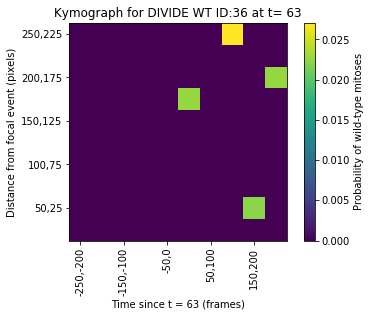

In [19]:
plot = render.plot_P_events(P_events_hist, 'DIVIDE', wt_cells, target_cell, focal_time, radius, t_range)